<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None


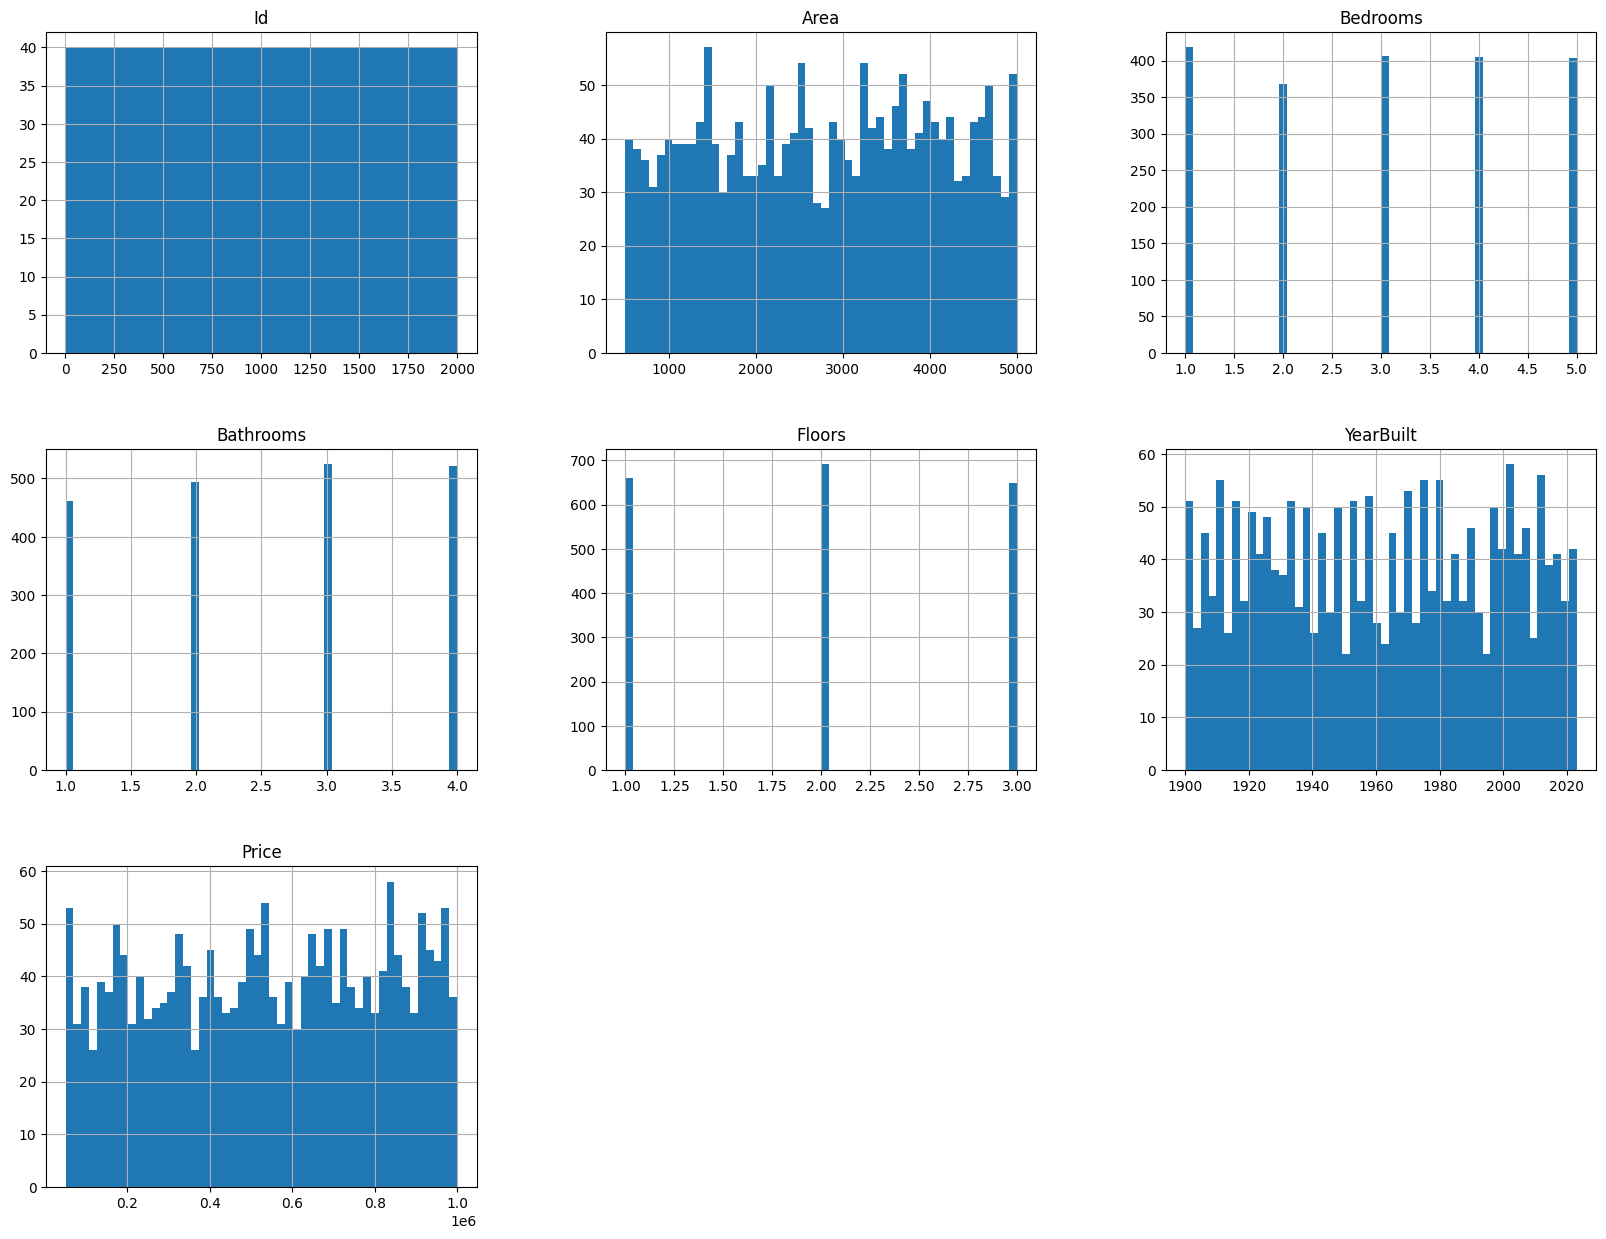

In [1]:
import pandas as pd

housing = pd.read_csv('datasets/House Price Prediction Dataset.csv')

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show
housing.head()
print(housing.info())


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# Processing all data into numerical data
#turning condition of the house into an ordinal scale
condition = housing['Condition'].unique()
enc = OrdinalEncoder(categories = [condition])
housing['Condition'] = enc.fit_transform(housing[['Condition']])
garage = housing['Garage'].unique()
enc = OrdinalEncoder(categories = [garage])
housing['Garage'] = enc.fit_transform(housing[['Garage']])

In [3]:
# turning location into a one hot encoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(housing[['Location']])

housing = pd.concat([housing.drop(columns=['Location']), ohetransform], axis=1)
housing.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban
0,1,1360,5,4,3,1970,0.0,0.0,149919,1.0,0.0,0.0,0.0
1,2,4272,5,4,3,1958,0.0,0.0,424998,1.0,0.0,0.0,0.0
2,3,3592,2,2,3,1938,1.0,0.0,266746,1.0,0.0,0.0,0.0
3,4,966,4,2,2,1902,2.0,1.0,244020,0.0,0.0,1.0,0.0
4,5,4926,1,4,2,1975,2.0,1.0,636056,1.0,0.0,0.0,0.0


In [4]:
#Splitting the data between training and testing data
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

housing["price_cat"] = pd.cut(housing["Price"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["price_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#strat_train_set.head()


In [5]:
#removing information and splitting labels
housing = strat_train_set.drop("price_cat", axis=1)
train_labels = strat_train_set["Price"].copy()
housing = housing.drop("Price", axis=1)


test_labels = strat_test_set["Price"].copy()
strat_test_set = strat_test_set.drop("Price", axis=1)
strat_test_set = strat_test_set.drop("price_cat", axis=1)
strat_test_set.head()
#housing.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban
1294,1295,1747,3,3,2,1941,2.0,1.0,1.0,0.0,0.0,0.0
1702,1703,605,2,2,3,1918,1.0,1.0,0.0,1.0,0.0,0.0
1681,1682,2890,3,1,3,1954,2.0,0.0,0.0,0.0,0.0,1.0
276,277,3233,1,4,1,2013,0.0,1.0,0.0,0.0,1.0,0.0
1928,1929,2264,1,1,1,1955,0.0,1.0,1.0,0.0,0.0,0.0


In [6]:
#scaling and imputing

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_prep = scaler.fit_transform(housing)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#actual modelling for linear regression
lin_reg = LinearRegression()
lin_reg.fit(housing_prep, train_labels)


some_labels = (strat_test_set.iloc[:5])
print("5 tests")
print(list(test_labels.iloc[:5]))
print(lin_reg.predict(scaler.transform(strat_test_set.iloc[:5])))

5 tests
[942215, 809925, 783902, 726894, 632761]
[529430.49632972 533225.71489432 517830.59583087 559671.76748584
 511495.21589767]


In [ ]:
#